In [1]:
!pip install owlready2 rdflib scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.3/27.3 MB 83.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.1/565.1 kB 47.1 MB/s eta 0:00:00
  Created wheel for owlready2: filename=owlready2-0.47-cp311-cp311-linux_x86_64.whl size=24577526 sha256=a5a8353b52af7b96d74c94129acf83a3fa6a8a3add6db81e2518cb87df040ecd
  Stored in directory: /root/.cache/pip/wheels/25/9a/a3/fb1ac6339caa859c8bb18d685736168b0b51d851af13d81d52
Successfully built owlready2


The DecisionTreeClassifier is a supervised learning algorithm in scikit-learn used for classification tasks. It builds a model in the form of a tree-like structure, where:

Internal nodes represent decisions based on feature values.

Branches represent outcomes of those decisions.

Leaf nodes represent final class labels (predictions).

In [2]:
from owlready2 import *
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

# Load your ontology file (change this path to your OWL file)
onto = get_ontology("http://www.lesfleursdunormal.fr/static/_downloads/pizza_onto.owl").load()

# Step 1: Extract ontology classes and their annotations
data = []
labels = []

for cls in onto.classes():
    label = cls.name
    annotations = []

    # Collect label, comments, and subclasses as textual features
    if cls.label:
        annotations.extend(cls.label)
    if cls.comment:
        annotations.extend(cls.comment)
    annotations.extend([sub.name for sub in cls.subclasses()])

    data.append(" ".join(annotations))
    labels.append(label)

# Step 2: Convert text to feature vectors using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data)

# For demo, use class names as labels (in practice, use meaningful categories)
y = labels

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train a classifier
clf = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    min_samples_split=4,
    max_features='sqrt',
    random_state=42
)
clf.fit(X_train, y_train)

# Step 5: Evaluate
y_pred = clf.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))



Classification Report:

               precision    recall  f1-score   support

CheeseTopping       0.00      0.00      0.00       1.0
  FishTopping       0.00      0.00      0.00       1.0
  MeatTopping       0.00      0.00      0.00       0.0

     accuracy                           0.00       2.0
    macro avg       0.00      0.00      0.00       2.0
 weighted avg       0.00      0.00      0.00       2.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

Random Forest is an ensemble learning algorithm that combines multiple decision trees to improve predictive performance and control overfitting. It is used for both classification and regression tasks.

It’s based on the idea of building a “forest” of many decision trees during training time and outputting either the mode of the classes (classification) or the mean prediction (regression) of the individual trees.

In [3]:
import rdflib
import pandas as pd
import numpy as np
from rdflib.namespace import RDF, RDFS
from rdflib import URIRef, Literal
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load RDF data
g = rdflib.Graph()
g.parse("prod.fibo-quickstart.ttl", format="ttl")

# Define URIs
LEGAL_ENTITY = URIRef("https://www.omg.org/spec/Commons/Organizations/LegalEntity")
OPERATES_IN_COUNTRY = URIRef("https://spec.edmcouncil.org/fibo/ontology/FBC/FunctionalEntities/Markets/operatesInCountry")
IS_MANAGED_BY = URIRef("https://www.omg.org/spec/Commons/Organizations/isManagedBy")
LABEL = RDFS.label

# Extract data
data = []

for s in g.subjects(RDF.type, LEGAL_ENTITY):
    entity = {
        "uri": str(s),
        "label": str(g.value(s, LABEL)) if g.value(s, LABEL) else None,
        "country": str(g.value(s, OPERATES_IN_COUNTRY)) if g.value(s, OPERATES_IN_COUNTRY) else None,
        "manager": str(g.value(s, IS_MANAGED_BY)) if g.value(s, IS_MANAGED_BY) else None,
        "revenue": np.random.uniform(1e6, 1e9),     # synthetic feature
        "employees": np.random.randint(50, 10000),  # synthetic feature
        "is_issuer": np.random.choice([0, 1])       # synthetic label
    }
    data.append(entity)

# Convert to DataFrame
df = pd.DataFrame(data)

# Drop unused columns
X = df[['revenue', 'employees']]
y = df['is_issuer']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [4]:
# Train model

clf = RandomForestClassifier(
    n_estimators=200,  # no of trees
    max_depth=10,  # depth of each tree
    min_samples_split=5,
    max_features='sqrt',
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.54      0.67      0.60        67
           1       0.54      0.41      0.46        64

    accuracy                           0.54       131
   macro avg       0.54      0.54      0.53       131
weighted avg       0.54      0.54      0.53       131



In [5]:
import numpy as np
import pandas as pd

# Function to load the trained model and make predictions
def predict_is_issuer(revenue, employees):
    # Prepare the feature vector for prediction
    input_data = pd.DataFrame({
        'revenue': [revenue],
        'employees': [employees]
    })

    # Use the trained classifier to predict the 'is_issuer' label
    is_issuer_pred = clf.predict(input_data)

    # Return the prediction result
    return is_issuer_pred[0]

# Example usage of the inference function
new_revenue = np.random.uniform(1e6, 1e9)  # Random revenue value for testing
new_employees = np.random.randint(50, 10000)  # Random number of employees for testing

# Get the prediction
prediction = predict_is_issuer(new_revenue, new_employees)

# Print the result
if prediction == 1:
    print(f"The new entity with revenue {new_revenue} and {new_employees} employees is an issuer.")
else:
    print(f"The new entity with revenue {new_revenue} and {new_employees} employees is not an issuer.")


The new entity with revenue 275758158.08818877 and 2586 employees is not an issuer.


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, log_loss
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Configure Logistic Regression with hyperparameters
clf_lr = LogisticRegression(
    penalty='l2',             # Regularization type (L2 is default)
    C=1.0,                    # Inverse of regularization strength
    solver='lbfgs',           # Solver that supports loss convergence tracking
    max_iter=100,             # Maximum number of iterations
    verbose=1,                # Print loss per iteration
    random_state=42
)

# Fit the model
clf_lr.fit(X_train, y_train)
y_pred = clf_lr.predict(X_test)
y_prob = clf_lr.predict_proba(X_test)

# Report
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.51      1.00      0.68        67
           1       0.00      0.00      0.00        64

    accuracy                           0.51       131
   macro avg       0.26      0.50      0.34       131
weighted avg       0.26      0.51      0.35       131



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Logistic Regression is a classification algorithm that predicts the probability of a binary outcome (i.e., whether something is 0 or 1, true or false, yes or no). Despite its name, it is not a regression technique in the traditional sense (like linear regression); instead, it’s used for classification tasks.

The goal is to find the best-fitting model to describe the relationship between the input features (independent variables) and the probability of a particular outcome.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


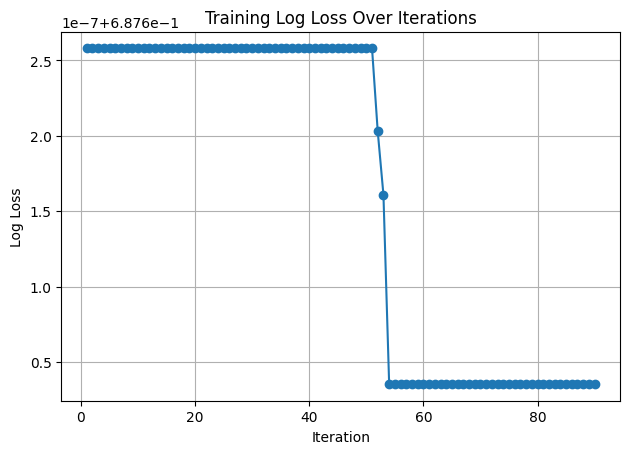

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

losses = []
clf_lr = LogisticRegression(
    penalty='l2',           # Type of regularization to prevent overfitting.
                           # 'l2' applies Ridge (squared) penalty on coefficients.

    C=1.0,                  # Inverse of regularization strength.
                           # Smaller values (e.g., 0.1) mean **stronger regularization**.
                           # Larger values (e.g., 10) mean **weaker regularization**.

    solver='lbfgs',          # Optimization algorithm used to minimize the loss function.


    max_iter=10,             # Maximum number of iterations to run in each `.fit()` call.

    warm_start=True,        # When True, reuse the solution from the previous call to `.fit()`.
                           # Useful for manual iteration control or tracking loss over time.

    random_state=42         # Ensures reproducibility by setting the random seed.
)


# Perform 100 iterations manually
for i in range(90):
    clf_lr.fit(X_train, y_train)  # This does 1 iteration due to max_iter=1
    y_prob = clf_lr.predict_proba(X_train)
    loss = log_loss(y_train, y_prob)
    losses.append(loss)

# Plot the loss
plt.plot(range(1, len(losses) + 1), losses, marker='o')
plt.title("Training Log Loss Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Log Loss")
plt.grid(True)
plt.tight_layout()
plt.show()


Support Vector Machine is a powerful, flexible classifier used for both binary and multi-class classification problems. It works by finding the hyperplane that best separates data points into different classes. The goal is to find the maximum margin hyperplane that maximizes the distance between the closest data points (called support vectors) of each class.

In [39]:
from sklearn.svm import SVC
import numpy as np
import pandas as pd

# Train the Support Vector Machine model
from sklearn.svm import SVC

clf_svm = SVC(
    C=1.0,                  # Regularization parameter (default=1.0). Smaller values = softer margin, more regularization.
    kernel='rbf',           # Kernel type: 'linear', 'poly', 'rbf', 'sigmoid'. RBF (Gaussian) handles non-linear separation well.
    degree=3,               # Degree of the polynomial kernel function (used only if kernel='poly').
    gamma='scale',          # Defines influence of training points (used in 'rbf', 'poly', 'sigmoid'). 'scale' = 1 / (n_features * X.var()).
    coef0=0.0,              # Independent term in kernel function (used in 'poly' and 'sigmoid').
    shrinking=True,         # Whether to use the shrinking heuristic for speed.
    probability=False,      # If True, enables probability estimates (adds Platt scaling). Slows down training.
    tol=1e-3,               # Tolerance for stopping criteria.
    cache_size=200,         # Size of kernel cache in MB.
    class_weight=None,      # Set class weights automatically with 'balanced' or supply a dict.
    verbose=False,          # Enable verbose output during fitting.
    max_iter=-1,            # Limit on iterations. -1 means no limit.
    random_state=42         # Controls random shuffling (relevant only when probability=True or in cross-validation).
)

clf_svm.fit(X_train, y_train)
y_pred = clf_svm.predict(X_test)
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))




=== Classification Report ===
              precision    recall  f1-score   support

           0       0.51      1.00      0.68        67
           1       0.00      0.00      0.00        64

    accuracy                           0.51       131
   macro avg       0.26      0.50      0.34       131
weighted avg       0.26      0.51      0.35       131



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The K-Nearest Neighbors (KNN) algorithm is a simple, supervised machine learning method used for both classification and regression tasks. It predicts the class or value of a new data point by considering its nearest neighbors in a feature space. KNN works by finding the "k" closest data points to a new input and then either assigning the new point to the majority class of those neighbors (for classification) or predicting its value as the average or weighted average of the neighbors' values (for regression).

In [40]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd

# Train the k-NN model
clf_knn = KNeighborsClassifier(
    n_neighbors=5,             # The number of neighbors to use for classification. Default is 5.
    weights='uniform',         # 'uniform': all neighbors have equal weight, 'distance': closer neighbors have more weight.
    algorithm='auto',          # 'auto': chooses the best algorithm based on the dataset (ball_tree, kd_tree, brute, etc.)
    leaf_size=30,              # The leaf size for the BallTree and KDTree algorithms. Default is 30.
    metric='minkowski',        # Distance metric to use. 'minkowski' is the default, and p=2 corresponds to Euclidean distance.
    p=2,                       # The power parameter for the Minkowski distance metric. p=2 corresponds to Euclidean distance.
    n_jobs=-1,                 # The number of parallel jobs to run for neighbor search. -1 means using all available CPUs.
)
clf_knn.fit(X_train, y_train)
y_pred = clf_knn.predict(X_test)
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.53      0.72      0.61        67
           1       0.53      0.33      0.40        64

    accuracy                           0.53       131
   macro avg       0.53      0.52      0.51       131
weighted avg       0.53      0.53      0.51       131



The MLPClassifier (Multilayer Perceptron Classifier) is a supervised learning algorithm for classification tasks, which belongs to the family of artificial neural networks (ANN). The "Multilayer" part refers to the network's structure, which includes multiple layers of neurons (or nodes) that process information.

MLP is a feedforward neural network where data moves in one direction — from the input layer through hidden layers to the output layer. MLP can capture non-linear relationships in the data, making it powerful for complex classification tasks. It is typically used for problems where simpler models like Logistic Regression or K-Nearest Neighbors might struggle to find patterns.

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define and train MLP
mlp = MLPClassifier(hidden_layer_sizes=(16, 8), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# Predictions
y_pred = mlp.predict(X_test)

# Evaluation
print("=== MLP Classifier Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

=== MLP Classifier Evaluation ===
Accuracy: 0.5190839694656488
Confusion Matrix:
 [[68  0]
 [63  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.52      1.00      0.68        68
           1       0.00      0.00      0.00        63

    accuracy                           0.52       131
   macro avg       0.26      0.50      0.34       131
weighted avg       0.27      0.52      0.35       131



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


| **Feature**                    | **Feedforward Neural Network (FNN)**                  | **RNN**                                                     | **CNN**                                            | **LSTM**                                             | **GAN**                                    | **Autoencoder**                              | **Transformer**                                                                            |
| ------------------------------ | ----------------------------------------------------- | ----------------------------------------------------------- | -------------------------------------------------- | ---------------------------------------------------- | ------------------------------------------ | -------------------------------------------- | ------------------------------------------------------------------------------------------ |
| **Structure**                  | Simple, layers of neurons                             | Contains loops and feedback                                 | Convolutional layers                               | Contains memory cells and gates                      | Two networks (generator and discriminator) | Encoder-decoder structure                    | Attention-based architecture with layers of self-attention and feedforward networks        |
| **Data Flow**                  | One-way from input to output                          | Feedback loops (sequential)                                 | Local receptive fields (images)                    | Sequential (time-series)                             | Adversarial training (game-like)           | Compress and reconstruct                     | Parallel processing, attention mechanisms capture relationships                            |
| **Use Cases**                  | Classification, regression                            | Time-series, text, speech                                   | Image recognition, segmentation                    | Long-term memory retention in sequences              | Data generation, augmentation              | Dimensionality reduction, feature extraction | Natural language processing (translation, text generation, summarization)                  |
| **Strengths**                  | Simple, works well for structured data                | Sequence learning, time-series                              | Feature extraction for images                      | Long-term memory retention                           | Realistic data generation                  | Data compression, denoising                  | Efficient at handling long-range dependencies, parallelization, scalable to large datasets |
| **Handling Long Dependencies** | Poor (cannot capture long-term dependencies)          | Struggles with long dependencies due to vanishing gradients | Not applicable (works with spatial data)           | Good, but struggles with very long-term dependencies | Not applicable                             | Not applicable                               | Excellent, thanks to self-attention                                                        |
| **Training Efficiency**        | Moderate (sequential data)                            | Slow due to sequential nature                               | Fast due to shared weights                         | Slow (due to sequential nature)                      | Efficient due to adversarial setup         | Moderate (autoencoders)                      | Very fast due to parallelization and attention mechanism                                   |
| **Memory**                     | No memory (independent units)                         | Memory via hidden states                                    | No memory (independent features)                   | Memory cells with gates                              | No memory (generator-discriminator)        | Latent space representation                  | Self-attention allows for flexible contextual memory across input sequence                 |
| **Main Application Area**      | Structured data (tabular, regression, classification) | Sequence-based tasks (speech, text, time-series)            | Image-related tasks (classification, segmentation) | Sequential data with long-term dependencies          | Generating new data from noise             | Data compression, noise removal              | Text and language tasks (generation, summarization, translation)                           |
